In [1]:
%config IPCompleter.greedy=True
# %matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv('train.csv')
train.head()

,ID,DateTime,TempOut,HiTemp,LowTemp,OutHum,DewPt,WindSpeed,WindDir,WindRun,...,WindTx,ISSRecpt,ArcInt,PA,PB,PC,PD,PE,PF,PG
0,PR00001,07-12-2040 0:15,53.5,53.6,53.5,85,49.1,2,SSE,0.5,...,1,100.0,15,1,1,1,1,1,1,1
1,PR00002,07-12-2040 0:30,53.5,53.5,53.4,85,49.1,2,SSE,0.5,...,1,100.0,15,1,1,1,1,1,1,1
2,PR00003,07-12-2040 0:45,53.3,53.5,53.2,85,48.9,2,SSE,0.5,...,1,100.0,15,1,1,1,1,1,1,1
3,PR00004,07-12-2040 1:00,53.1,53.3,53.0,86,49.0,2,S,0.5,...,1,100.0,15,1,1,1,1,1,1,1
4,PR00005,07-12-2040 1:15,52.9,53.1,52.9,86,48.8,2,S,0.5,...,1,100.0,15,1,1,1,1,1,1,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 37 columns):
ID              40000 non-null object
DateTime        40000 non-null object
TempOut         40000 non-null float64
HiTemp          40000 non-null float64
LowTemp         40000 non-null float64
OutHum          40000 non-null int64
DewPt           40000 non-null float64
WindSpeed       40000 non-null int64
WindDir         40000 non-null object
WindRun         40000 non-null float64
HiSpeed         40000 non-null int64
HiDir           40000 non-null object
WindChill       40000 non-null float64
HeatIndex       40000 non-null float64
THWIndex        40000 non-null float64
Bar             40000 non-null float64
Rain            40000 non-null float64
RainRate        40000 non-null float64
HeatDD          40000 non-null float64
CoolDD          40000 non-null float64
InTemp          40000 non-null float64
InHum           40000 non-null int64
InDew           40000 non-null float64
InHeat

In [5]:
train.corr()

,TempOut,HiTemp,LowTemp,OutHum,DewPt,WindSpeed,WindRun,HiSpeed,WindChill,HeatIndex,...,WindTx,ISSRecpt,ArcInt,PA,PB,PC,PD,PE,PF,PG
TempOut,1.000000,0.999016,0.997934,-0.760999,0.514769,0.505322,0.505322,0.543677,0.999008,0.997370,...,NaN,-0.002226,NaN,0.191000,0.187726,0.183378,0.178264,0.172692,0.167018,0.160992
HiTemp,0.999016,1.000000,0.997799,-0.766949,0.508606,0.511188,0.511188,0.549135,0.997832,0.995947,...,NaN,-0.001991,NaN,0.189183,0.185948,0.181650,0.176595,0.171085,0.165473,0.159520
LowTemp,0.997934,0.997799,1.000000,-0.753150,0.519205,0.511173,0.511173,0.547212,0.996875,0.995686,...,NaN,-0.002441,NaN,0.192722,0.189445,0.185079,0.179935,0.174330,0.168609,0.162535
OutHum,-0.760999,-0.766949,-0.753150,1.000000,0.123583,-0.483666,-0.483666,-0.513849,-0.753988,-0.719567,...,NaN,0.000475,NaN,-0.030012,-0.028772,-0.027217,-0.025561,-0.023830,-0.021923,-0.020060
DewPt,0.514769,0.508606,0.519205,0.123583,1.000000,0.178021,0.178021,0.193896,0.520461,0.567098,...,NaN,-0.004275,NaN,0.273815,0.272070,0.268943,0.264630,0.259584,0.254393,0.248483
WindSpeed,0.505322,0.511188,0.511173,-0.483666,0.178021,1.000000,1.000000,0.948606,0.478957,0.496802,...,NaN,0.000697,NaN,0.168522,0.174726,0.179822,0.183923,0.187322,0.189769,0.191620
WindRun,0.505322,0.511188,0.511173,-0.483666,0.178021,1.000000,1.000000,0.948606,0.478957,0.496802,...,NaN,0.000697,NaN,0.168522,0.174726,0.179822,0.183923,0.187322,0.189769,0.191620
HiSpeed,0.543677,0.549135,0.547212,-0.513849,0.193896,0.948606,0.948606,1.000000,0.520948,0.534048,...,NaN,-0.002227,NaN,0.188452,0.194424,0.199268,0.203073,0.206150,0.208321,0.209852
WindChill,0.999008,0.997832,0.996875,-0.753988,0.520461,0.478957,0.478957,0.520948,1.000000,0.996876,...,NaN,-0.002392,NaN,0.192529,0.189074,0.184545,0.179250,0.173505,0.167670,0.161490
HeatIndex,0.997370,0.995947,0.995686,-0.719567,0.567098,0.496802,0.496802,0.534048,0.996876,1.000000,...,NaN,-0.002330,NaN,0.202921,0.199536,0.195032,0.189718,0.183918,0.178023,0.171754


In [6]:
test=pd.read_csv('test.csv')

In [7]:
train['indicator']=1
test['indicator']=0

In [8]:
df=pd.concat([train,test])
df.head()

c:\users\akarsh somani\documents\on the plague trial\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,ArcInt,Bar,CoolDD,DateTime,DewPt,HeatDD,HeatIndex,HiDir,HiSpeed,HiTemp,...,RainRate,THWIndex,TempOut,WindChill,WindDir,WindRun,WindSamp,WindSpeed,WindTx,indicator
0,15,29.951,0.0,07-12-2040 0:15,49.1,0.120,53.4,SE,9,53.6,...,0.0,53.4,53.5,53.5,SSE,0.5,350,2,1,1
1,15,29.955,0.0,07-12-2040 0:30,49.1,0.120,53.4,SSE,7,53.5,...,0.0,53.4,53.5,53.5,SSE,0.5,352,2,1,1
2,15,29.954,0.0,07-12-2040 0:45,48.9,0.122,53.2,SSE,7,53.5,...,0.0,53.2,53.3,53.3,SSE,0.5,351,2,1,1
3,15,29.956,0.0,07-12-2040 1:00,49.0,0.124,53.0,S,5,53.3,...,0.0,53.0,53.1,53.1,S,0.5,351,2,1,1
4,15,29.959,0.0,07-12-2040 1:15,48.8,0.126,52.9,SW,6,53.1,...,0.0,52.9,52.9,52.9,S,0.5,351,2,1,1


In [9]:
df.isna().sum()/len(df)


ArcInt          0.000000
Bar             0.000000
CoolDD          0.000000
DateTime        0.000000
DewPt           0.000000
HeatDD          0.000000
HeatIndex       0.000000
HiDir           0.000000
HiSpeed         0.000000
HiTemp          0.000000
ID              0.000000
ISSRecpt        0.000000
InAirDensity    0.000000
InDew           0.000000
InEMC           0.000000
InHeat          0.000000
InHum           0.000000
InTemp          0.000000
LowTemp         0.000000
OutHum          0.000000
PA              0.359447
PB              0.359447
PC              0.359447
PD              0.359447
PE              0.359447
PF              0.359447
PG              0.359447
Rain            0.000000
RainRate        0.000000
THWIndex        0.000000
TempOut         0.000000
WindChill       0.000000
WindDir         0.000000
WindRun         0.000000
WindSamp        0.000000
WindSpeed       0.000000
WindTx          0.000000
indicator       0.000000
dtype: float64

SSE    14523
---    10479
S       6976
SW      5575
WSW     3843
SE      3768
SSW     3008
W       2534
WNW     2410
NW      1992
N       1768
ESE     1436
NNW     1180
E       1060
ENE      970
NNE      491
NE       433
Name: WindDir, dtype: int64


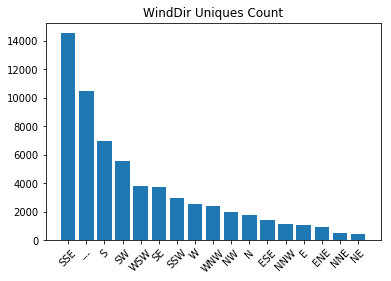

In [10]:
c
plt.bar(df['WindDir'].value_counts().index, df['WindDir'].value_counts().values)
plt.title('WindDir Uniques Count')
plt.xticks(rotation=45)
plt.show()

SSE    12837
---    10478
S       6103
SW      4781
SE      4449
WSW     4431
SSW     3870
W       3195
N       2207
WNW     2179
ESE     1874
NW      1779
NNW     1549
E       1025
ENE      837
NNE      488
NE       364
Name: HiDir, dtype: int64


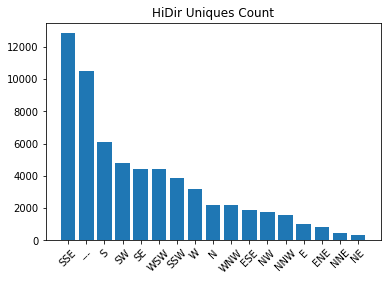

In [11]:
print(df['HiDir'].value_counts())
plt.bar(df['HiDir'].value_counts().index, df['HiDir'].value_counts().values)
plt.title('HiDir Uniques Count')
plt.xticks(rotation=45)
plt.show()

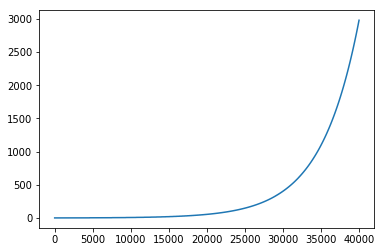

In [12]:
plt.plot(df['PA'])

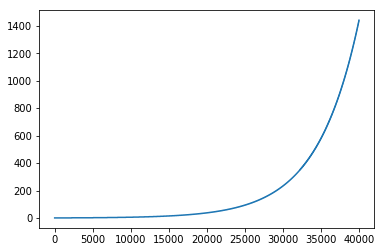

In [13]:
plt.plot(df['PB'])